In [1]:
import segyio
from segysak.segy import segy_header_scan
from IPython.display import display

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pylab import figure, cm
from matplotlib import colors
import plotly as px
import plotly.graph_objects as go
import plotly.express as px

In [3]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from itertools import product
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import scipy as sp
import segyio
import pylops
import re
from IPython.display import display
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
from functions.segy_file_read_plot import segy_file
from functions.plot_2D_sections import plot_2D_section, difference_map
from functions.data_processing import replace_nonexisting_data_with_NaN, take_data_that_exist, df_wells_from_section, standartization
from functions.machine_learning import predict_2d_RelAI_Seis_SeisInv, accuracy_score_cv, confusion_matrix_prediction, feature_importance_plot

In [6]:
from functions.facies_features_concat import concat_features_RelAI_Seis_SeisInv

In [7]:
from functions import NN_models

# dataset

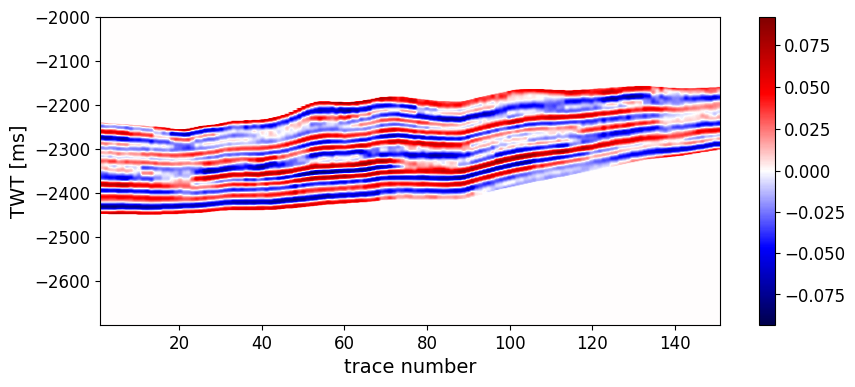

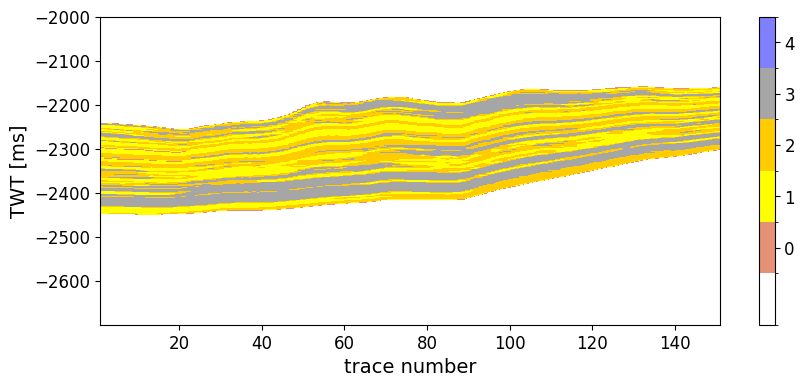

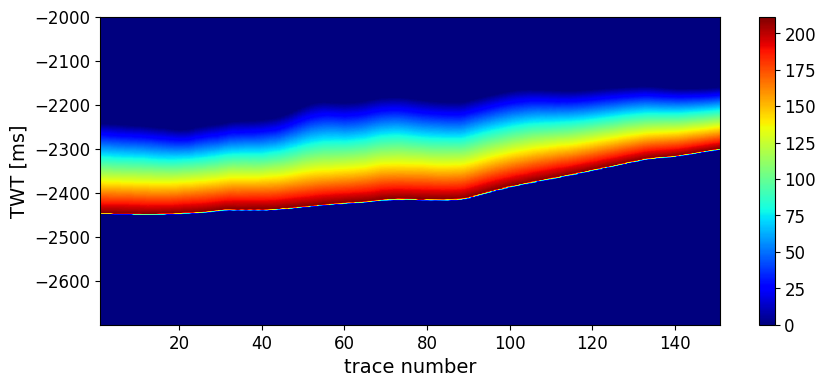

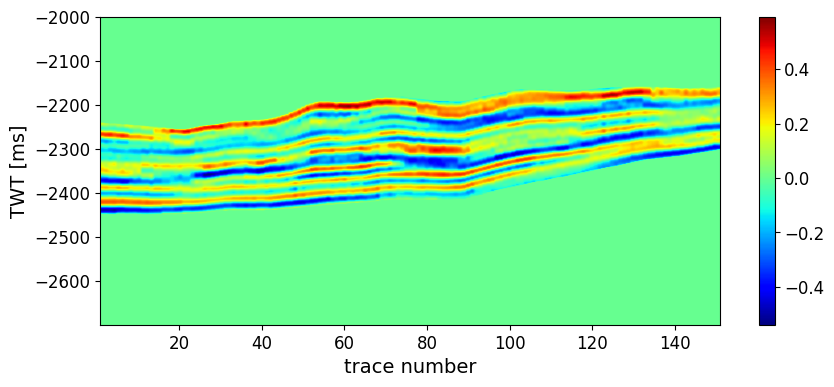

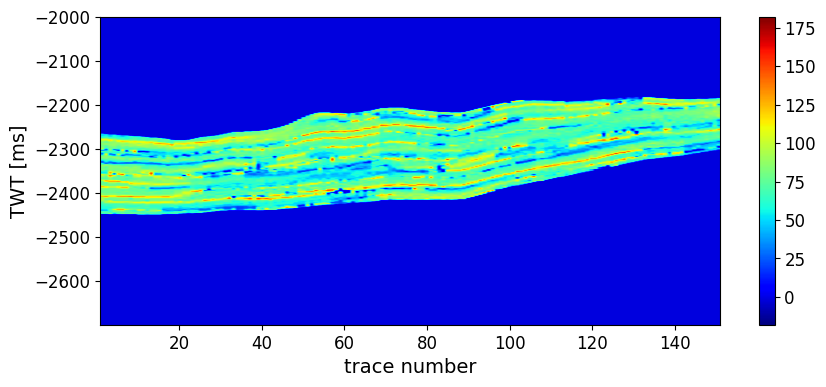

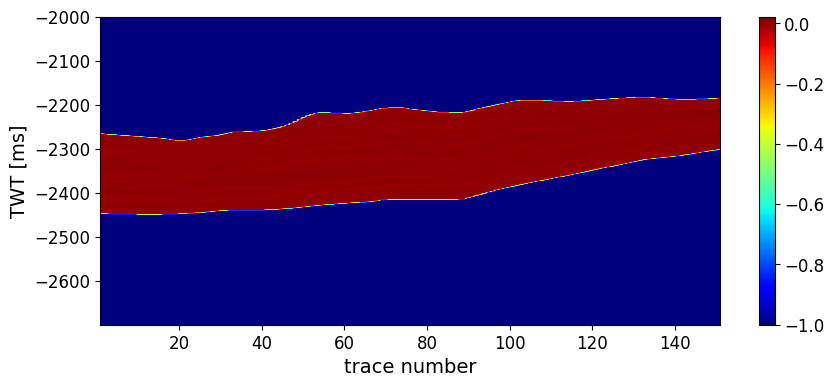

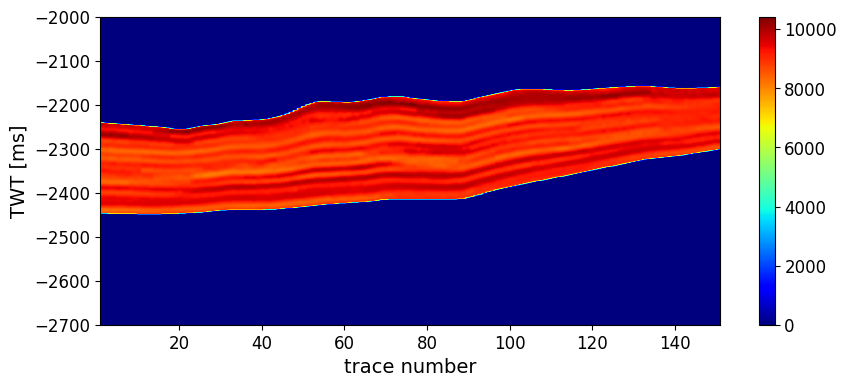

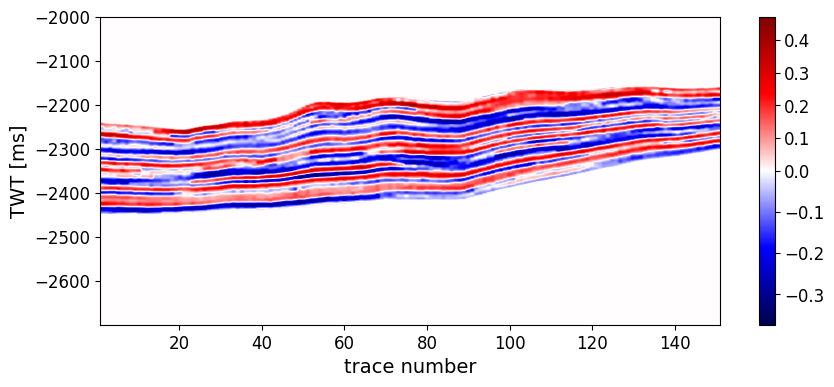

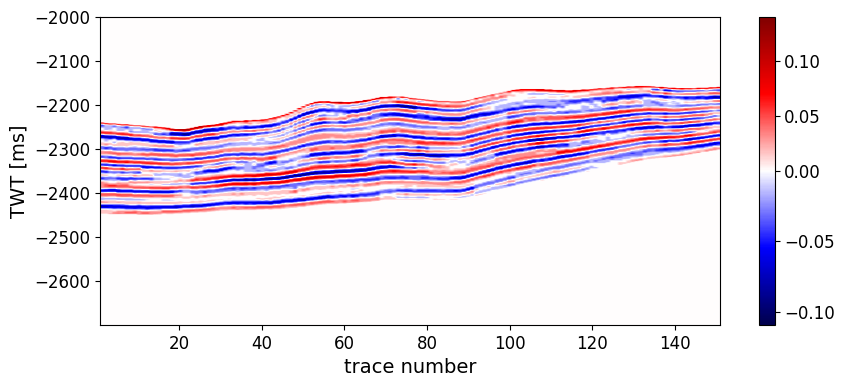

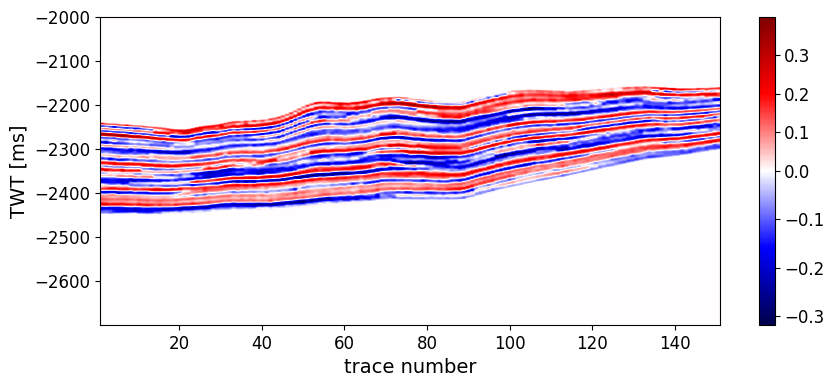

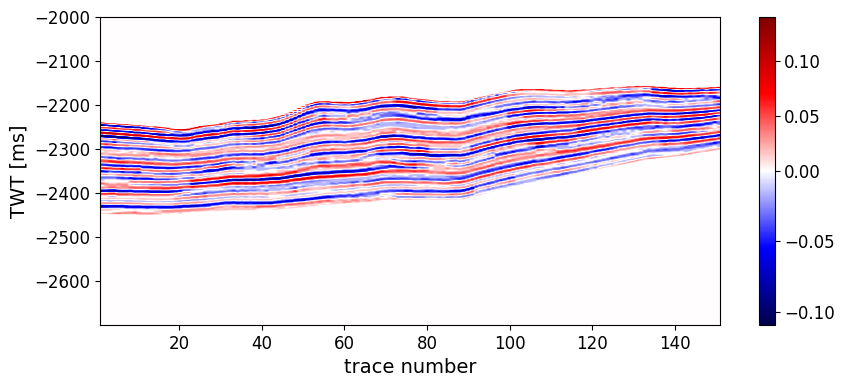

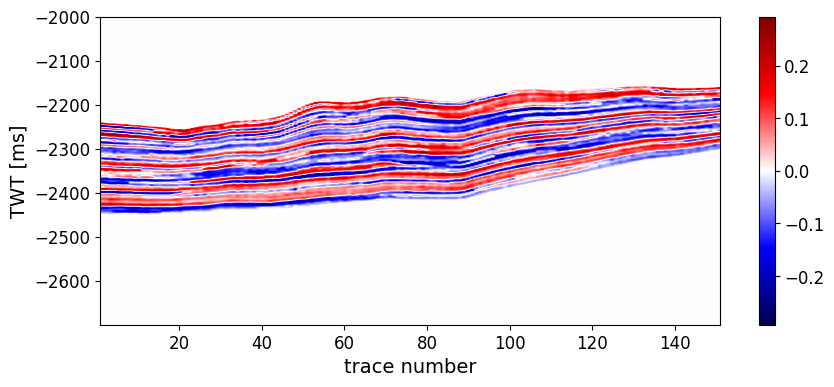

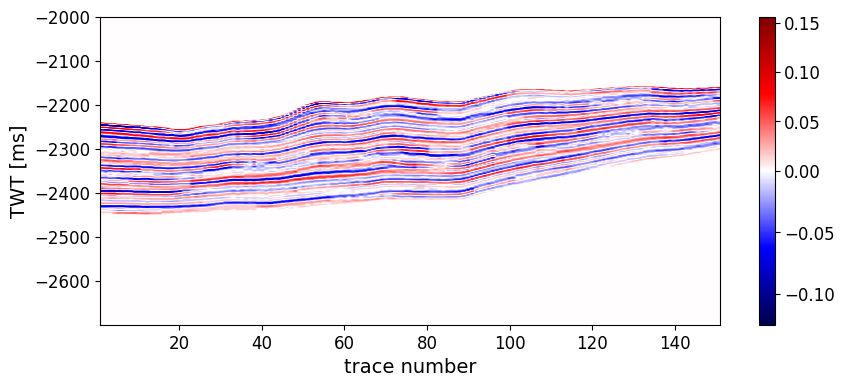

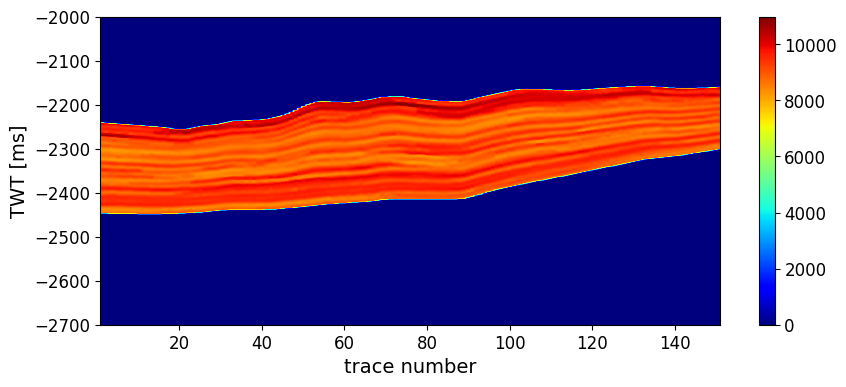

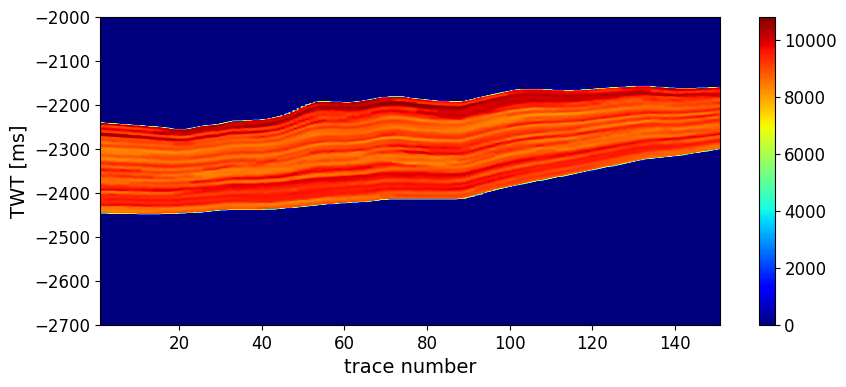

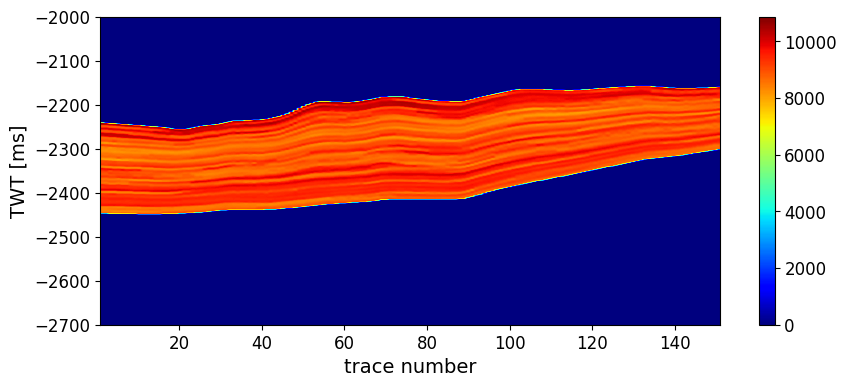

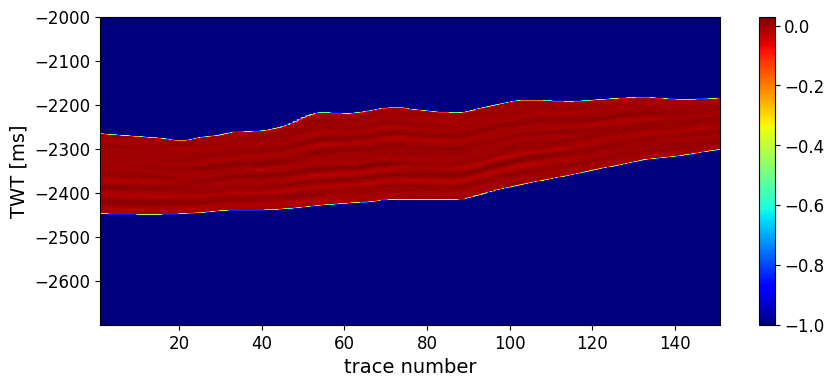

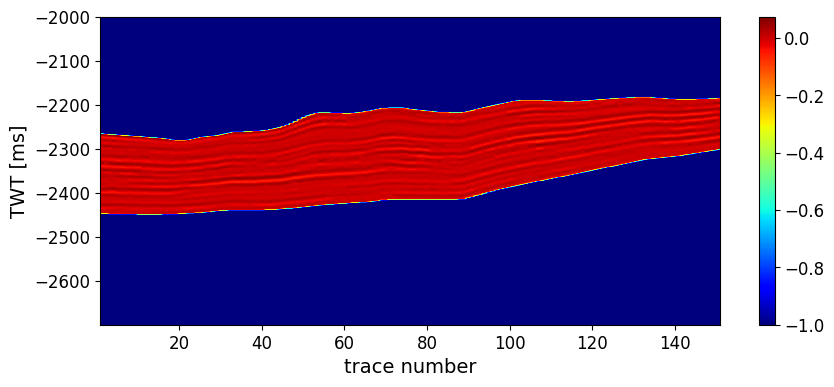

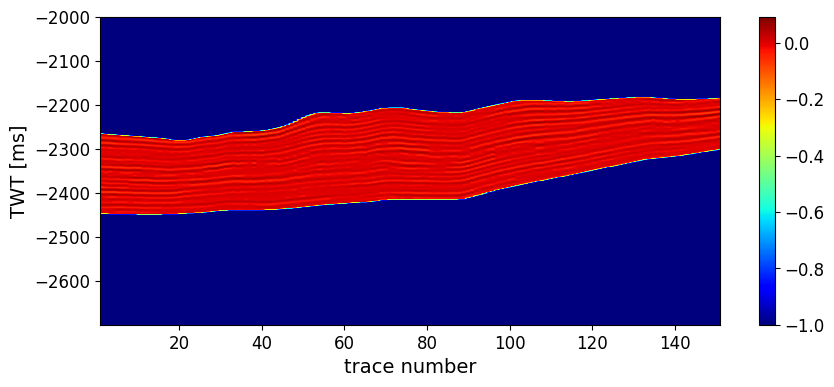

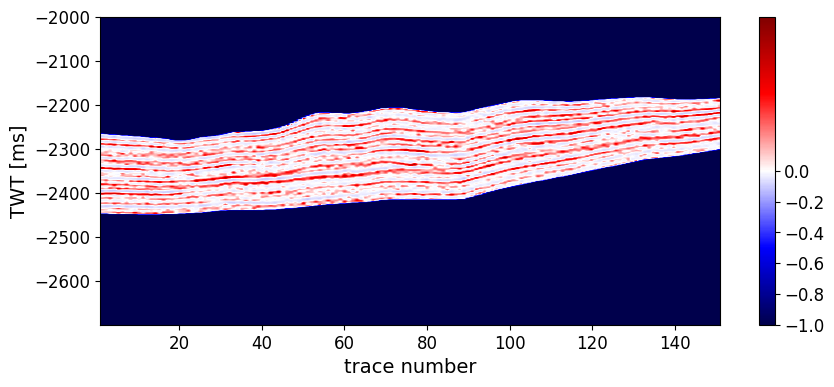

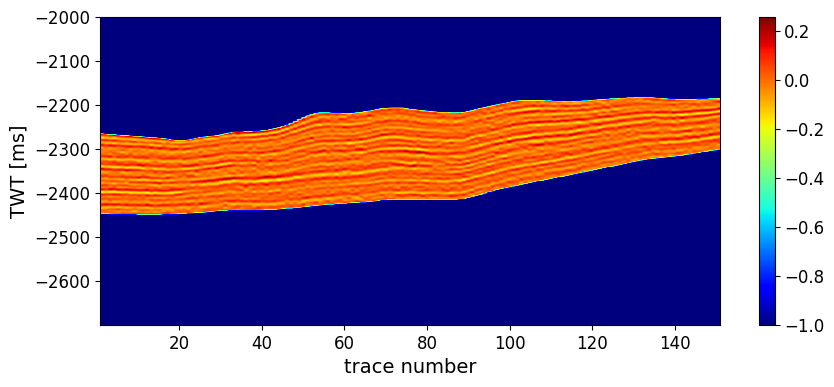

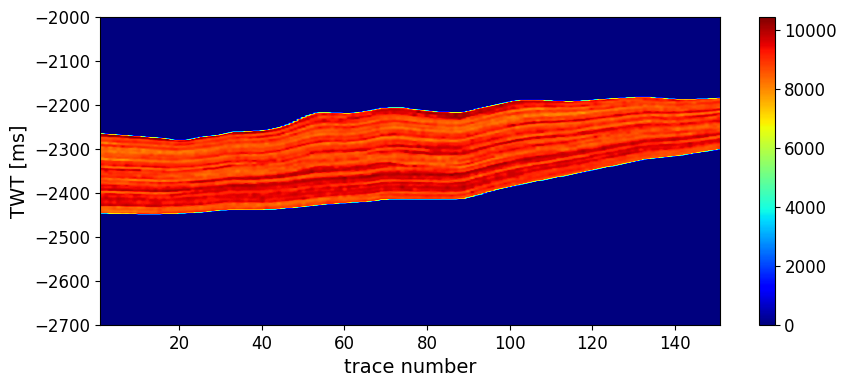

In [8]:
seismic, extent_seismic = segy_file(file_name='case_2_files/Seis_25Hz_case2.segy', color_map='seismic')
facies, extent_facies = segy_file(file_name='case_2_files/Facies_Median_Edt_case2.segy', color_map='facies')
depths, extent_depths = segy_file(file_name='case_2_files/Geologic_Time_case2.segy', color_map='depths')
rel_ai, extent_rel_ai = segy_file(file_name='case_2_files/Seis_25Hz_RelAcImp_case2.segy', color_map='relai')
Inst_freq, extent_inst_freq = segy_file(file_name='case_2_files/Inst_Freq_10_100_case2.segy', color_map='any')
Envelope, extent_sweet = segy_file(file_name='case_2_files/Envelope_10_100_case2.segy', color_map='any')
Seis_inv, extent_seis_inv = segy_file(file_name='case_2_files/Seis_Inv_25Hz_case2.segy', color_map='any')
relai_ormsby_10_60, extent_r_10_60 = segy_file(file_name='case_2_files/Seis_Ormsby_10_60_RelAcImp_case2.segy', color_map='seismic')
seis_ormsby_10_60, extent_s_10_60 = segy_file(file_name='case_2_files/Seis_Ormsby_10_60_case2.segy', color_map='seismic')
relai_ormsby_10_80, extent_r_10_80 = segy_file(file_name='case_2_files/Seis_Ormsby_10_80_RelAcImp_case2.segy', color_map='seismic')
seis_ormsby_10_80, extent_s_10_80 = segy_file(file_name='case_2_files/Seis_Ormsby_10_80_case2.segy', color_map='seismic')
relai_ormsby_10_100, extent_r_10_100 = segy_file(file_name='case_2_files/Seis_Ormsby_10_100_RelAcImp_case2.segy', color_map='seismic')
seis_ormsby_10_100, extent_s_10_100 = segy_file(file_name='case_2_files/Seis_Ormsby_10_100_case2.segy', color_map='seismic')
seis_inv_10_60, extent_si_10_60 = segy_file(file_name='case_2_files/Inversion_Ormsby_10_60_case2.segy', color_map='any')
seis_inv_10_80, extent_si_10_80 = segy_file(file_name='case_2_files/Inversion_Ormsby_10_80_case2.segy', color_map='any')
seis_inv_10_100, extent_si_10_100 = segy_file(file_name='case_2_files/Inversion_Ormsby_10_100_case2.segy', color_map='any')
spec_dec_30, extent_sd_30 = segy_file(file_name='case_2_files/SpecDecomp_30Hz_10_100_case2.segy', color_map='any')
spec_dec_60, extent_sd_60 = segy_file(file_name='case_2_files/SpecDecomp_60Hz_10_100_case2.segy', color_map='any')
spec_dec_90, extent_sd_90 = segy_file(file_name='case_2_files/SpecDecomp_90Hz_10_100_case2.segy', color_map='any')
seis_noise, extent_seis_noise = segy_file(file_name='case_2_files/Seis_Noise_10_100_case2.segy', color_map='seismic')
relai_noise, extent_relai_noise = segy_file(file_name='case_2_files/RelAcImp_Noise_10_100_case2.segy', color_map='any')
seis_inv_noise, extent_seis_inv_noise = segy_file(file_name='case_2_files/Inversion_Noise_10_100_case2.segy', color_map='any')

In [9]:
df_inst_freq = pd.DataFrame(Inst_freq.T)
df_envel = pd.DataFrame(Envelope.T)
df_depth = pd.DataFrame(depths.T)
df_facies = pd.DataFrame(facies.T)
df_seis = pd.DataFrame(seismic.T)
df_relai = pd.DataFrame(rel_ai.T)

df_inst_freq = df_inst_freq.iloc[0:700]
df_envel = df_envel.iloc[0:700]
df_depth = df_depth.iloc[0:700]
df_facies = df_facies.iloc[0:700]
df_seis = df_seis.iloc[0:700]
df_relai = df_relai.iloc[0:700]

In [10]:
df_seis_inv = pd.DataFrame(Seis_inv.T)
# Cut the last row in seis inve since it has 701 rows
df_seis_inv = df_seis_inv.iloc[0:700]

In [11]:
df_seis_noise = pd.DataFrame(seis_noise.T)
df_relai_noise = pd.DataFrame(relai_noise.T)
df_seis_inv_noise = pd.DataFrame(seis_inv_noise.T)

df_seis_noise = df_seis_noise.iloc[0:700]
df_relai_noise = df_relai_noise.iloc[0:700]
df_seis_inv_noise = df_seis_inv_noise.iloc[0:700]

In [12]:

df_seis_inv = replace_nonexisting_data_with_NaN(df_seis_inv, df_seis_inv.iloc[0,0])

In [13]:
# Standartize with value_to_drop:
df_depth_std = standartization(df_depth, value_to_drop=False)
df_depth_std

df_relai_std = standartization(df_relai, value_to_drop=False)
df_relai_std

df_seis_std = standartization(df_seis, value_to_drop=False)
df_seis_std

df_seis_inv_std = standartization(df_seis_inv, value_to_drop=False)


In [14]:
df_facies = df_facies.copy()
# df_new = pd.DataFrame(index=range(len(df_f_copy.index)), columns=df_f_copy.columns)

interval = {'from': [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5], 
'to':[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], 
'facies':[np.NaN, 0, 1, 2, 3, 4]}
int_pd = pd.DataFrame.from_dict(interval)
intervals = int_pd.set_index(pd.IntervalIndex.from_arrays(int_pd['from'], int_pd['to'], closed='right'))['facies']

for each_col in df_facies.columns:
    df_facies[each_col] = df_facies[each_col].map(intervals)

col_7 = [24, 44, 64, 84, 104, 124, 144]
df_facies[col_7].apply(pd.Series.value_counts)
df_facies_wells = df_wells_from_section(df_facies, col_7)

relai_std_wells = df_wells_from_section(df_relai_std, col_7)
seismic_std_wells = df_wells_from_section(df_seis_std, col_7)
df_seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_7)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, df_seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)

facies_and_features = facies_features_3.copy()

facies_and_features_NN = facies_and_features[['facies', 'relai', 'seis', 'seis_inv']]

facies_and_features_mixed = facies_and_features_NN.sample(frac=1) # shuffle the rows

In [15]:
facies_and_features_mixed = pd.get_dummies(facies_and_features_mixed, prefix='Label', columns = ['facies'])

train_set, test_val_set = train_test_split(facies_and_features_mixed, test_size=0.4)
test_set, val_set = train_test_split(test_val_set, test_size=0.5)

# Delete facies column
labels = ['Label_0.0', 'Label_1.0', 'Label_2.0', 'Label_3.0']

train_labels1 = train_set[labels].copy()
train_set = train_set.drop(labels, axis=1)

test_labels1 = test_set[labels].copy()
test_set = test_set.drop(labels, axis=1)

valid_labels1 = val_set[labels].copy()
val_set = val_set.drop(labels, axis=1)

train_labels2 = train_labels1.astype(np.uint8)
train_labels2

valid_labels2 = valid_labels1.astype(np.uint8)
test_labels2 = test_labels1.astype(np.uint8)

# Encode the labeles
train_labels = pd.get_dummies(train_labels1, prefix='Label')
val_labels = pd.get_dummies(valid_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')

In [16]:
val_labels

,Label_0.0,Label_1.0,Label_2.0,Label_3.0
191,False,False,False,True
245,False,False,False,True
410,False,True,False,False
336,False,False,True,False
235,False,True,False,False
...,...,...,...,...
344,False,True,False,False
343,False,True,False,False
201,False,False,False,True
321,False,False,True,False


# NN training

In [17]:
tf.random.set_seed(124) 
tf.debugging.set_log_device_placement(False)

In [18]:
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Cross-Validation'], loc='lower right')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Cross-Validation'], loc='upper right')
    plt.show()

In [19]:
def apply_model(model):
    r, c = np.shape(df_facies)
    map_facies = np.zeros((r, c))
    df_f_comparison = map_facies.copy()
    df_f_comparison[:] = np.NaN
    map_facies_1 = map_facies.copy()
    map_facies_1[:] = np.NaN
    empty_list = []

    map_facies_2 = np.zeros((r, c))
    map_facies_2[:] = np.NaN

    map_facies_encoded = np.zeros((r, 4))
    map_facies_encoded[:] = np.NaN


    facies_encoded = map_facies_encoded.copy()

    map_facies.shape

    # for every trace (column)
    for every_col in range(len(df_facies.columns)):
        new_df = pd.concat([df_relai_std.iloc[:,every_col], 
                            df_seis_std.iloc[:,every_col],
                            df_seis_inv_std.iloc[:,every_col]]
                            , axis=1)
        
        
        new_df_1 = new_df.dropna(axis=0)
        non_empty_facies = df_facies.iloc[:,every_col].dropna(axis=0)
        facies_encoded[new_df_1.index, :] = model.predict(new_df_1)
        
        facies_encoded_nn = np.array(pd.DataFrame(facies_encoded).idxmax(axis=1))
        # empty_list.append(facies_encoded_nn)
        facies_encoded_nn_1 = facies_encoded_nn.reshape(facies_encoded_nn.shape[0], -1)
        
        # Filter 
        map_facies_1[new_df_1.index, every_col] = facies_encoded_nn_1[new_df_1.index, 0]
        df_f_comparison[new_df_1.index, every_col] = df_facies.iloc[new_df_1.index, every_col]
        
        
            # Filter 
        map_facies_2[non_empty_facies.index, every_col] = map_facies_1[non_empty_facies.index, every_col]
        #df_f_comparison[new_df_1.index, every_col] = df_f_copy.iloc[new_df_1.index, every_col]
        

    df_f_comparison
    plot_2D_section(data_file=map_facies_2.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_7)


Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                144       
                                                                 
 dense_1 (Dense)             (None, 36)                1332      
                                                                 
 dense_2 (Dense)             (None, 4)                 148       
                                                                 
Total params: 1624 (6.34 KB)
Trainable params: 1624 (6.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



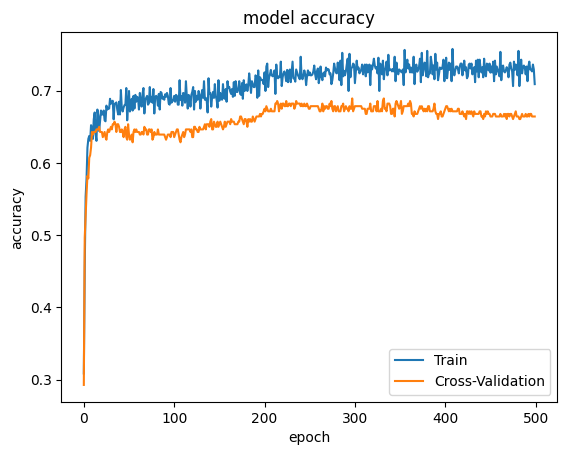

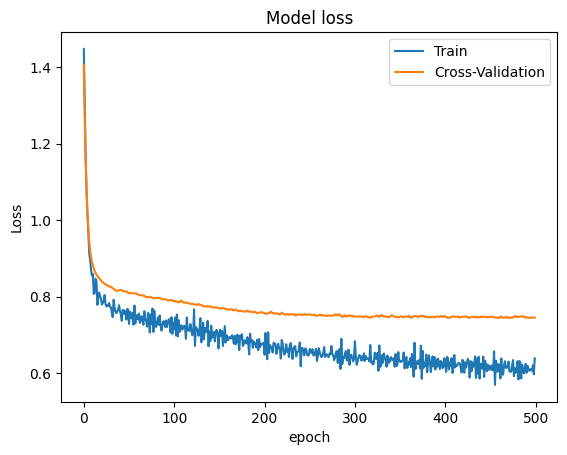

In [20]:
tf.random.set_seed(124) 
model1 = NN_models.NN_model_2_layer(train_set)

model1, history1 = NN_models.run(train_set,
        train_labels,
        val_set,
        val_labels,
        model = model1)
plot_history(history1)

Here is a summary of this model: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 36)                144       
                                                                 
 dense_4 (Dense)             (None, 4)                 148       
                                                                 
Total params: 292 (1.14 KB)
Trainable params: 292 (1.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


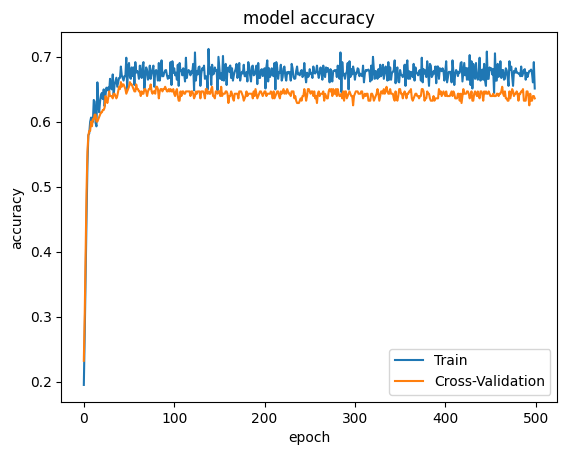

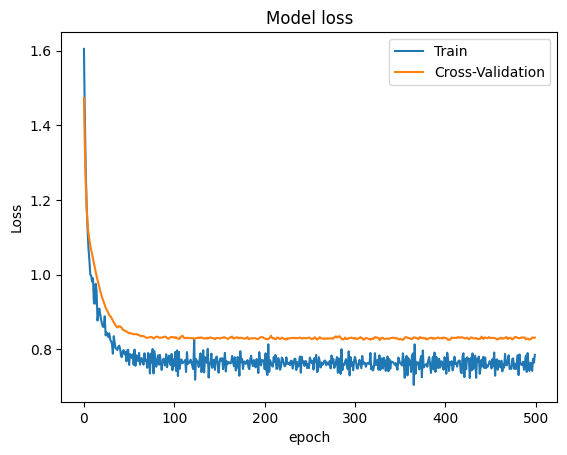

In [21]:
tf.random.set_seed(124) 
model2 = NN_models.NN_model_1_layer(train_set)

model2, history2 = NN_models.run(train_set,
        train_labels,
        val_set,
        val_labels,
        model = model2)
plot_history(history2)

Here is a summary of this model: 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 36)                144       
                                                                 
 dense_6 (Dense)             (None, 36)                1332      
                                                                 
 dense_7 (Dense)             (None, 36)                1332      
                                                                 
 dense_8 (Dense)             (None, 36)                1332      
                                                                 
 dense_9 (Dense)             (None, 4)                 148       
                                                                 
Total params: 4288 (16.75 KB)
Trainable params: 4288 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
____________________________________________________

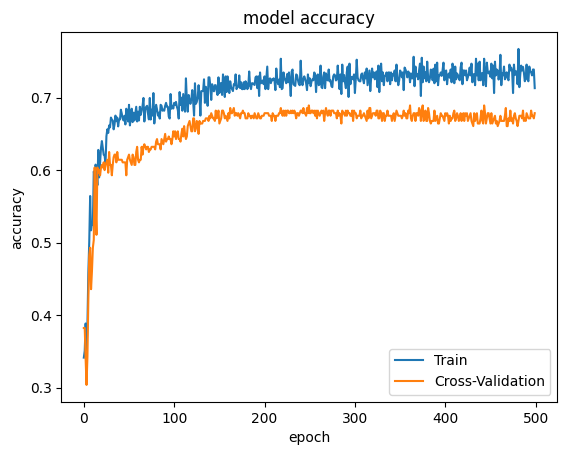

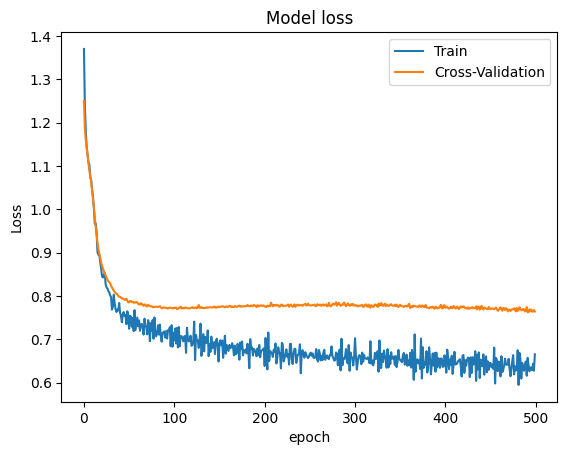

In [22]:
tf.random.set_seed(124) 
model3 = NN_models.NN_model_4_layer(train_set)

model3, history3 = NN_models.run(train_set,
        train_labels,
        val_set,
        val_labels,
        model = model3)
plot_history(history3)

Here is a summary of this model: 
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 51)                204       
                                                                 
 dense_11 (Dense)            (None, 51)                2652      
                                                                 
 dense_12 (Dense)            (None, 4)                 208       
                                                                 
Total params: 3064 (11.97 KB)
Trainable params: 3064 (11.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


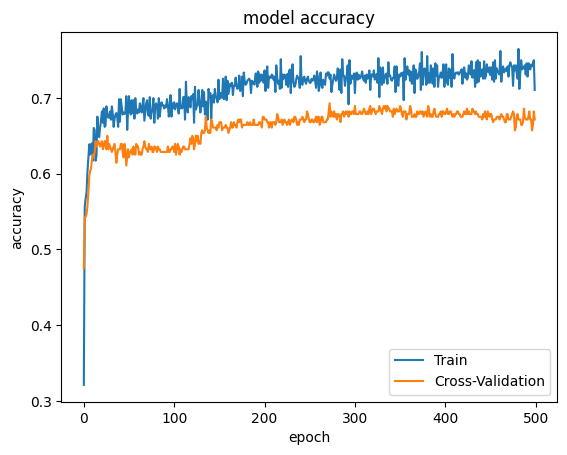

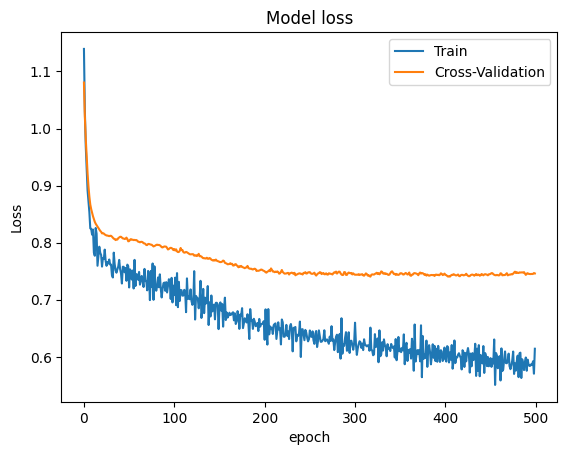

In [23]:
tf.random.set_seed(124) 
model4 = NN_models.NN_model_2_layer(train_set, neurans_per_layer=51)

model4, history4 = NN_models.run(train_set,
        train_labels,
        val_set,
        val_labels,
        model = model4)
plot_history(history4)

Here is a summary of this model: 
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1000)              4000      
                                                                 
 dense_14 (Dense)            (None, 4)                 4004      
                                                                 
Total params: 8004 (31.27 KB)
Trainable params: 8004 (31.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


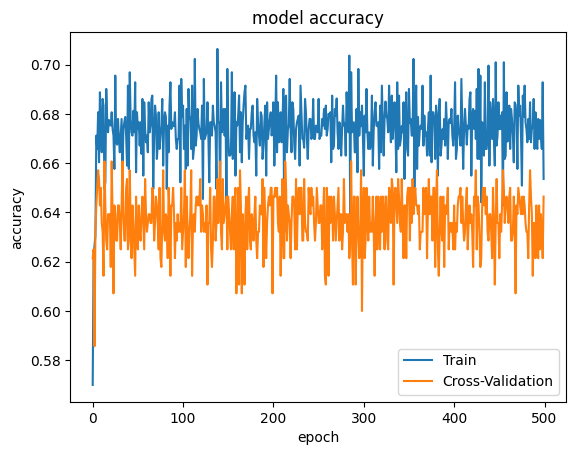

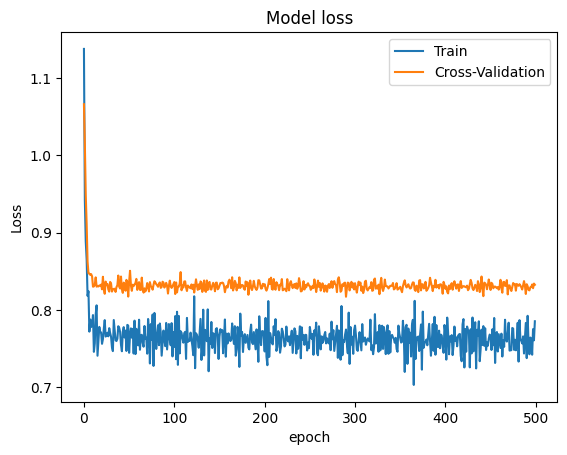

In [24]:
tf.random.set_seed(124) 
model5 = NN_models.NN_model_1_layer(train_set, neurans_per_layer=1000)

model5, history5 = NN_models.run(train_set,
        train_labels,
        val_set,
        val_labels,
        model = model5) 
plot_history(history5)

5/5 [==============================] - 0s 2ms/step


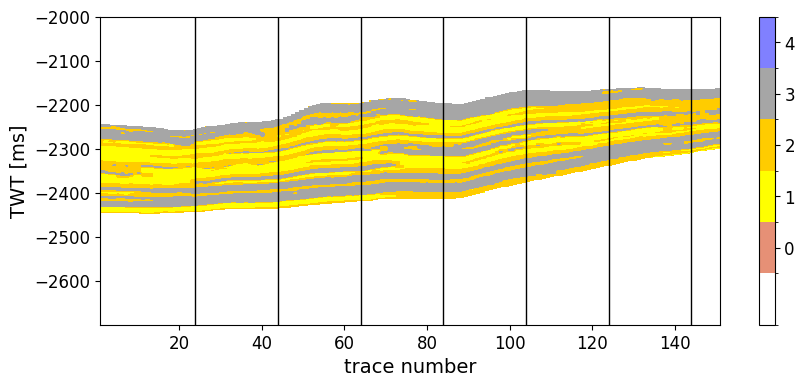

5/5 [==============================] - 0s 2ms/step


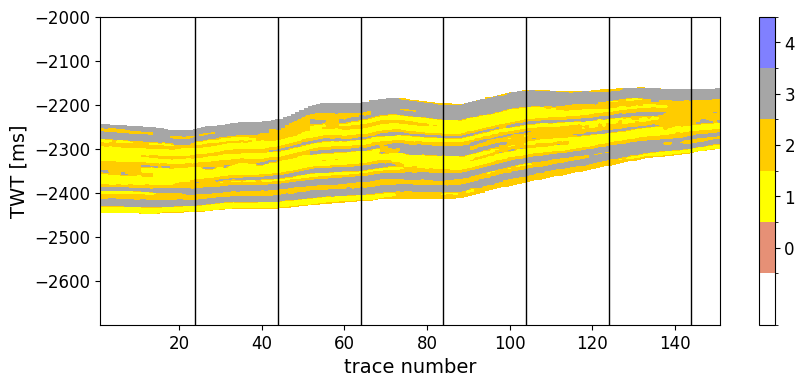

5/5 [==============================] - 0s 2ms/step


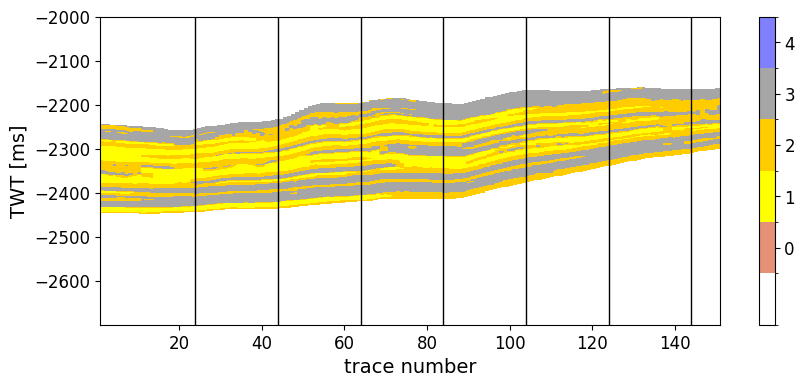

5/5 [==============================] - 0s 2ms/step


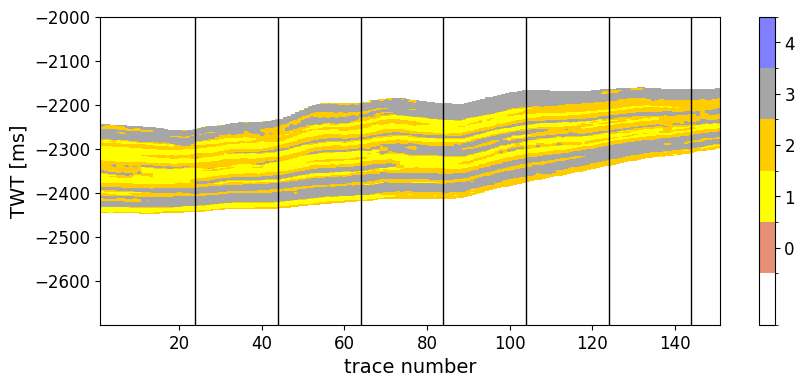

5/5 [==============================] - 0s 2ms/step


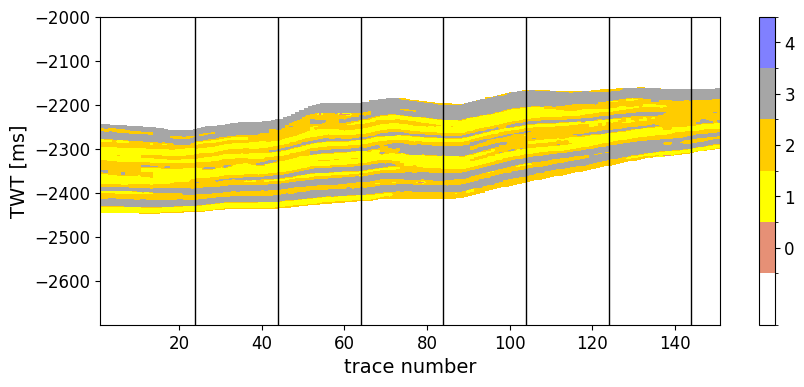

In [25]:
apply_model(model1)
apply_model(model2)
apply_model(model3)
apply_model(model4)
apply_model(model5)